# Automobile Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("DS1_C4_S5_Car_Data_Challenge.xlsx")

## 

## TASK - 1 :

### Identify the top 10 car manufacturers based on the city mileage and display the result using a horizontal bar graph with the manufacturer on the y-axis and mileage on the x-axis. Do you notice any outlier in the above output? If yes,  what is the reason and how would you resolve it?

In [3]:
data = data.sort_values('City_Mileage_km_litre',ascending=False)

In [4]:
A = data.drop_duplicates(subset = ["Make"], keep='first')
top_10 = A.sort_values("City_Mileage_km_litre",ascending=False).head(10)

In [5]:
top_10 = pd.concat([top_10['Make'],top_10['City_Mileage_km_litre']],axis=1)

<Axes: title={'center': 'Top 10 Car Manufacturers'}, xlabel='City Mileage', ylabel='Car Manufacturers'>

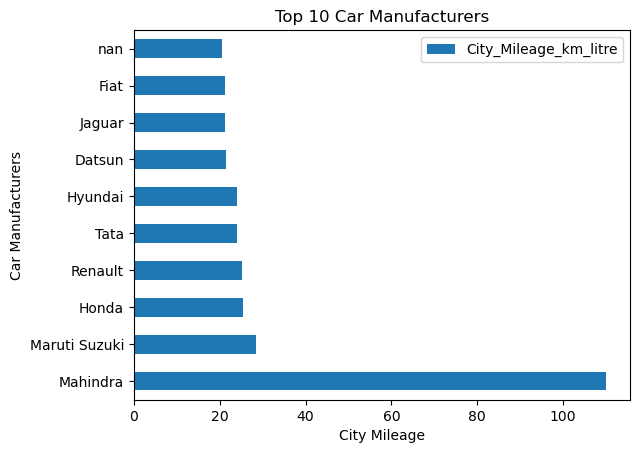

In [6]:
top_10.plot(x='Make',
            kind='barh',
            stacked = False,
            title='Top 10 Car Manufacturers',xlabel='City Mileage',ylabel='Car Manufacturers')

<Axes: title={'center': 'City_Mileage_km_litre'}, xlabel='Top 10 manufacturers', ylabel='City Mileage'>

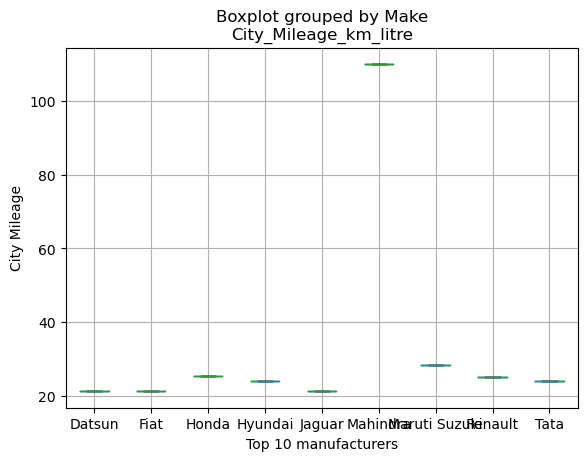

In [7]:
top_10.boxplot(column='City_Mileage_km_litre',by='Make',
                 xlabel='Top 10 manufacturers',ylabel='City Mileage')

### Interpretation  : Mahindra is an outlier among the top 10 manufacturers, because it has very high city mileage.

# 

## TASK - 2 :

### Identity the top 20 nonelectric car manufacturers based on city mileage and display the result using a bar graph like that in task 1.

In [8]:
B = A[A["Fuel_Type"]!='Electric']
top_20 = B.sort_values("City_Mileage_km_litre",ascending=False).head(20)

In [9]:
top_20 = pd.concat([top_20['Make'],top_20['City_Mileage_km_litre']],axis=1)

<Axes: title={'center': 'Top 20 Nonelectric Car Manufacturers'}, xlabel='City Mileage', ylabel='Car Manufacturers'>

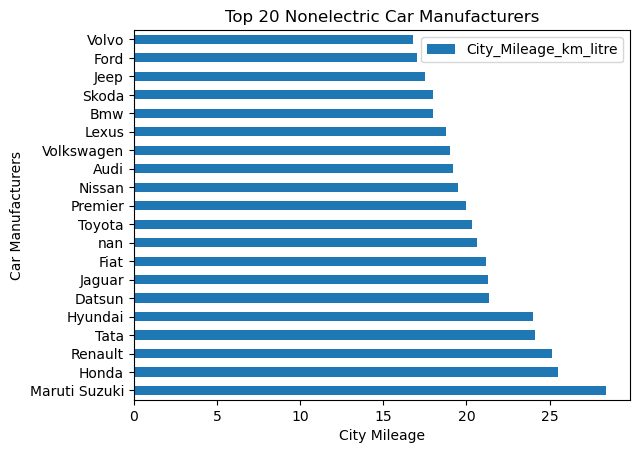

In [10]:
top_20.plot(x = 'Make',
            kind='barh',
            stacked = False,
            title='Top 20 Nonelectric Car Manufacturers',xlabel='City Mileage',ylabel='Car Manufacturers')

### Interpretation : Above are the top 20 non-electric car manufacturers with the highest city mileage, Maruti Suzuki is the car manufacturer which has highest city mileage.

## 

## TASK - 3 :

### A new car manufacturer wants to introduce a new car and wants information about the top 5 most preferred car body types Display result using a horizontal bar chart.

In [11]:
C = data.value_counts('Body_Type').head()
C = pd.DataFrame(C)

<Axes: title={'center': 'Top 5 Car Manufacturers'}, xlabel='No. of Cars', ylabel='Body Type'>

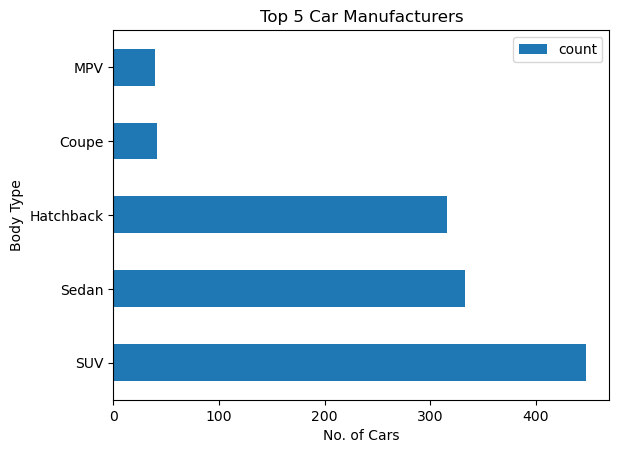

In [12]:
C.plot(kind='barh',
       stacked = False,
       title='Top 5 Car Manufacturers',xlabel='No. of Cars',ylabel='Body Type')

### Interpretation : SUV is the most popular car body type among the five most preferred cars. 

## 

## TASK - 4 :

### Display the car mileages for the following four companies using a pivot table: Hyundai, Mahindra, Renault and Skoda.

In [13]:
a = ['Hyundai', 'Mahindra', 'Renault' ,'Skoda']

In [14]:
D = data[data['Make'].isin(a)]
city_mil_mean = pd.pivot_table(D,index=['Make'],values=['City_Mileage_km_litre'],aggfunc='mean')
print("Mean of City Mileage\n")
city_mil_mean

Mean of City Mileage



,City_Mileage_km_litre
Make,
Hyundai,16.679853
Mahindra,20.003763
Renault,20.554286
Skoda,13.953333


In [15]:
city_mil_median = pd.pivot_table(D,index=['Make'],values=['City_Mileage_km_litre'],aggfunc='median')
print("Median of City Mileage\n")
city_mil_median

Median of City Mileage



,City_Mileage_km_litre
Make,
Hyundai,16.38
Mahindra,16.00
Renault,21.04
Skoda,14.50


In [16]:
High_mil_mean = pd.pivot_table(D,index=['Make'],values=['Highway_Mileage_km_litre'],aggfunc='mean')
print("Mean of Highway Mileage\n")
High_mil_mean

Mean of Highway Mileage



,Highway_Mileage_km_litre
Make,
Hyundai,18.294146
Mahindra,18.140175
Renault,17.690000
Skoda,17.268529


In [17]:
High_mil_median = pd.pivot_table(D,index=['Make'],values=['Highway_Mileage_km_litre'],aggfunc='median')
print("Median of Highway Mileage\n")
High_mil_median

Median of Highway Mileage



,Highway_Mileage_km_litre
Make,
Hyundai,18.50
Mahindra,17.21
Renault,19.60
Skoda,16.00


### 

## TASK - 5 :

### Display the mean and median values of city mileages of the following manufacturers, using a stacked column chart. Hyundai, Renault, Mahindra and Skoda.

In [18]:
stk_data = {
    'Make':['Hyundai', 'Mahindra', 'Renault' ,'Skoda'],
    'Mean values' : [16.67,20.00,20.54,13.95],
    'Median values' : [16.38,16.00,21.04,14.50]
    }
stk_data = pd.DataFrame(stk_data)

<Axes: >

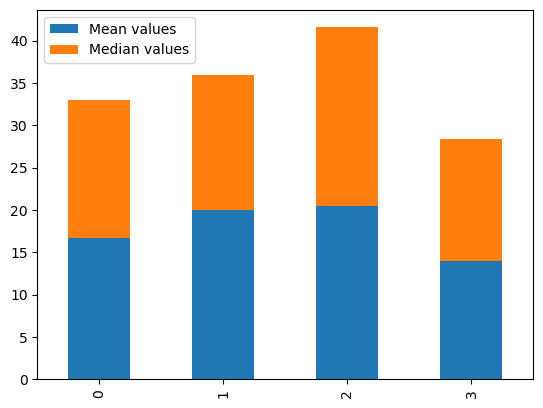

In [19]:
stk_data.plot(kind='bar',
             stacked=True)

## 

## TASK - 6 :

### Display the average mileage (city and highway) of all manufacturers using a horizontal bar chart, in ascending order of mileage.

In [20]:
fill_data = data.copy()

In [21]:
fill_data["City_Mileage_km_litre"]= fill_data["City_Mileage_km_litre"].fillna(fill_data["City_Mileage_km_litre"].mean())
fill_data["Highway_Mileage_km_litre"]= fill_data["Highway_Mileage_km_litre"].fillna(fill_data["Highway_Mileage_km_litre"].mean())

In [22]:
avg_city = pd.pivot_table(fill_data,index=['Make'],values=['City_Mileage_km_litre'],aggfunc='mean')
avg_city = avg_city.sort_values(by="City_Mileage_km_litre")

In [23]:
avg_high = pd.pivot_table(fill_data,index=['Make'],values=['Highway_Mileage_km_litre'],aggfunc='mean')
avg_high = avg_high.sort_values(by="Highway_Mileage_km_litre")

<Axes: ylabel='Make'>

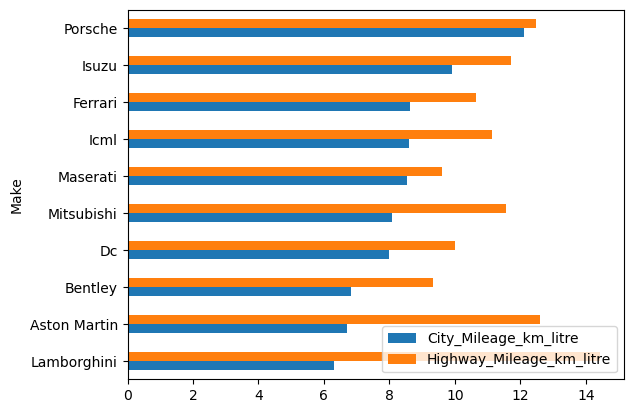

In [24]:
avg_mileage = avg_city.merge(avg_high,on='Make',how='outer').head(10)
avg_mileage.plot(kind='barh',
                stacked=False)

### Interpretation : The graph compares the average highest city and highway mileage for all manufacturers above graph showing results for 10 manufacturers.

## 

## TASK - 7 :

### Plot a line chart to understand the relation between displacement and city mileage by choosing the top 10 cars with the highest city mileage. What do you infer from this graph ? Are these any unusual observations? if yes, how would you resolve these?

In [25]:
data_2 = data.drop_duplicates(subset = ["Model"], keep='first')

<Axes: title={'center': 'Relation between Displacement and city mileage'}, xlabel='Displacement', ylabel='City Mileage'>

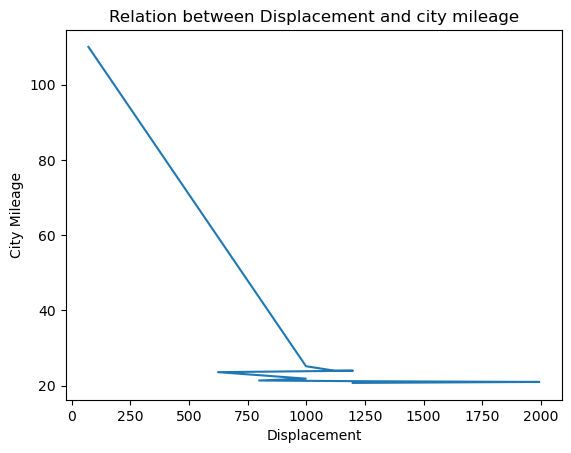

In [26]:
top_10_model = data_2.groupby(['Displacement'])['City_Mileage_km_litre'].mean().sort_values(ascending=False).head(10)
top_10_model.plot(x='Displacement',
                  kind='line',
                  stacked=False,
                 title=('Relation between Displacement and city mileage'),ylabel='City Mileage',xlabel='Displacement')

### Interpretation :The graph shows that displacement and city mileage have a negative relation, meaning that as one increases, the other decreases. However, this relation is not consistent for all the cars, especially when the displacement is above 700 cc. 

## 

## TASK - 8 : 

### Help Smith choose a car that is relatively safer compared to other cars in the market. Display 10 manufacturers of such cars. the cars with high safety features include child safety lock hill assist, high speed alert system, seat belt alert etc. Use the bar graph to display the names of top 10 manufacturers with the mileages and all the safety features mentioned above.

In [27]:
safe_cars = fill_data[(fill_data["Child_Safety_Locks"]=='Yes') & (fill_data["Hill_Assist"]=='Yes') & 
                 (fill_data["High_Speed_Alert_System"]=='Yes') &(fill_data["Passenger_Side_Seat-Belt_Reminder"]=='Yes') & 
                      (fill_data["Central_Locking"]=='Yes') & (fill_data["ABS_(Anti-lock_Braking_System)"]=='Yes') ]

In [28]:
safe_cars = safe_cars.sort_values(by='City_Mileage_km_litre')

In [29]:
Safe_cars = safe_cars.drop_duplicates(subset = ["Make"], keep='first').head(10)

<Axes: title={'center': 'Top 10 Car Manufacturers'}, xlabel='Manufacturer', ylabel='City mileage'>

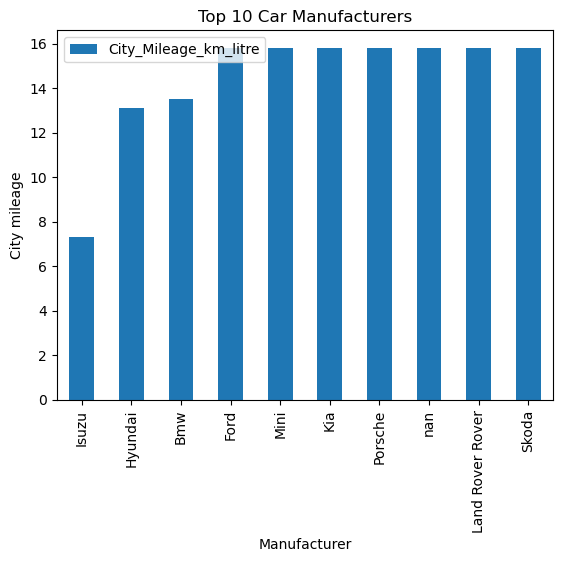

In [30]:
Safe_cars.plot(x='Make',
               y='City_Mileage_km_litre',
               kind='bar',
               stacked = False,
               title='Top 10 Car Manufacturers',xlabel='Manufacturer',ylabel='City mileage')

### Interpretation : The graph shows the top 10 manufacturers based on their safety features.

## 

## TASK - 9 :

### List all the details of cars that can adapt to various driving conditions such as normal, comfort, eco, sport and power mode. How many cars have all the above-mentioned features?

In [31]:
modes = ['Normal, Comfort, Eco, Sport, Power Mode']

In [32]:
car_modes = data[data["Drive_Modes"].isin(modes)]
car_modes

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
321,321,Audi,Q8,55 Tfsi Quattro Tiptronic,2995.0,4.0,4.0,AWD (All Wheel Drive),V,"Front, Longitudinal",...,Yes,NaN,"Roller cam follower, continuous intake and exh...",Yes,Yes,NaN,Yes,Yes,NaN,NaN
330,330,Audi,A8 L,55 Tfsi Quattro,2995.0,8.0,4.0,AWD (All Wheel Drive),V,"Front, Longitudinal",...,Yes,NaN,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN


### Interpretation : Q8(Audi) & A8 L(Audi) are the two cars which adopts the various driving condition such as Normal, Comfort, Eco, Sport and Power Mode.

## 

## TASK - 10 :

### Analyze the spread of fuel economy using a histogram for all car models of the following manufacturers: Hyundai, Suzuki, Tata and BMW which of these manufacturers have the most skewed mileage distribution? 

<Axes: title={'center': 'Spread of fuel Economy'}, ylabel='Fuel Economy'>

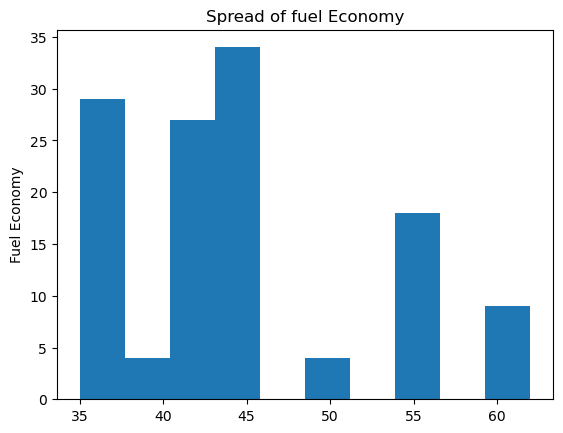

In [33]:
Hyundai = data[data['Make']=='Hyundai']
Hyundai['Fuel_Tank_Capacity_litre'].plot.hist(bins=10,title='Spread of fuel Economy',ylabel='Fuel Economy')

<Axes: title={'center': 'Spread of fuel Economy'}, ylabel='Fuel Economy'>

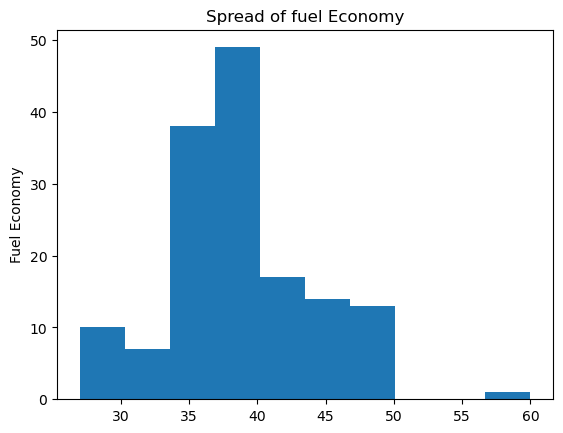

In [34]:
Suzuki = data[data['Make']=='Maruti Suzuki']
Suzuki['Fuel_Tank_Capacity_litre'].plot.hist(bins=10,title='Spread of fuel Economy',ylabel='Fuel Economy')

<Axes: title={'center': 'Spread of fuel Economy'}, ylabel='Fuel Economy'>

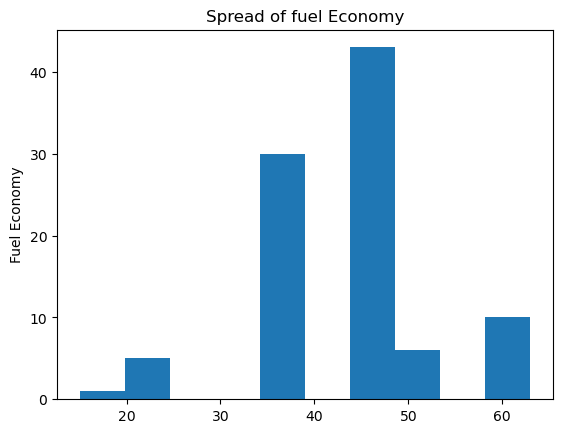

In [35]:
Tata = data[data['Make']=='Tata']
Tata['Fuel_Tank_Capacity_litre'].plot.hist(bins=10,title='Spread of fuel Economy',ylabel='Fuel Economy')

<Axes: title={'center': 'Spread of fuel Economy'}, ylabel='Fuel Economy'>

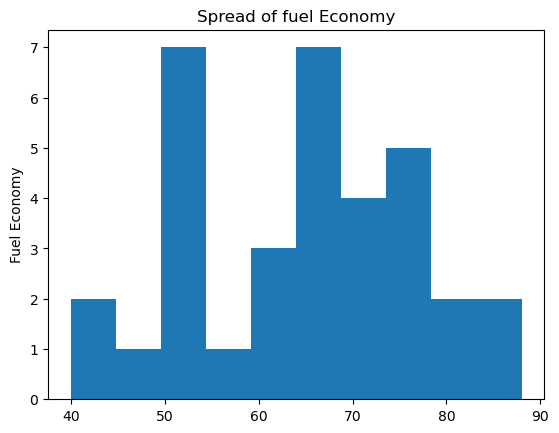

In [36]:
BMW = data[data['Make']=='Bmw']
BMW['Fuel_Tank_Capacity_litre'].plot.hist(bins=10,title='Spread of fuel Economy',ylabel='Fuel Economy')

### Interpretation : The graphs data for Hyundai, Tata and Suzuki shows that their fuel economy is skewed This indicates that there are some outliers.

## 